<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/DS_Unit_2_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [7]:
import pandas as pd

names = ['age', 'workclass', 'fnlwgt', 'education', 'education_numeric', 'marital',
         'occupation', 'relationship', 'race','gender', 'capital_gain','capital_loss',
         'work_hours', 'native_country','target']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                header=None,
                names = names)
df.head()

,age,workclass,fnlwgt,education,education_numeric,marital,occupation,relationship,race,gender,capital_gain,capital_loss,work_hours,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.shape

(32561, 15)

In [9]:
# validating we didn't lose columns when naming
pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data').shape

(32560, 15)

In [10]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_numeric    0
marital              0
occupation           0
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
work_hours           0
native_country       0
target               0
dtype: int64

In [11]:
import numpy as np
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education_numeric     int64
marital              object
occupation           object
relationship         object
race                 object
gender               object
capital_gain          int64
capital_loss          int64
work_hours            int64
native_country       object
target               object
dtype: object

In [0]:
categorical = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'gender', 'native_country']

df = pd.get_dummies(df, columns=categorical)

## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [14]:
# TODO - your work!

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

X = df.drop(['target'], axis='columns')
y = df['target'].values
model = LogisticRegression()
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
for feature,coef in zip(df.drop(['target'], axis='columns').columns, model.coef_[0]):
  print(feature,coef)

age -0.007064751863442657
fnlwgt -3.703325344603052e-06
education_numeric -0.00175788040091257
capital_gain 0.0003382607219922047
capital_loss 0.0007789392740877216
work_hours -0.008220105573905541
workclass_ ? -0.00010364399048753715
workclass_ Federal-gov 2.7595619741184013e-05
workclass_ Local-gov 3.938840462128243e-06
workclass_ Never-worked -5.092906159509893e-07
workclass_ Private -0.0004565008454817164
workclass_ Self-emp-inc 6.956181203121531e-05
workclass_ Self-emp-not-inc -2.0457147036526127e-05
workclass_ State-gov -8.83099655572965e-06
workclass_ Without-pay -1.2920171319452327e-06
education_ 10th -5.8574208572862546e-05
education_ 11th -8.157177555247133e-05
education_ 12th -2.6404898739842276e-05
education_ 1st-4th -9.858172513423676e-06
education_ 5th-6th -1.931960034808881e-05
education_ 7th-8th -4.282179380599777e-05
education_ 9th -3.257248746672989e-05
education_ Assoc-acdm -1.1081516052918152e-05
education_ Assoc-voc -1.4270726469762316e-05
education_ Bachelors 0.00

In [16]:
X = scale(df.drop(['target'], axis='columns'))
y = df['target'].values
model = LogisticRegression()
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
# now these are more comparable.
for feature,coef in zip(df.drop(['target'], axis='columns').columns, model.coef_[0]):
  print(feature,coef)

age 0.3476167888101695
fnlwgt 0.07459018463715505
education_numeric 0.36868722023046935
capital_gain 2.3440980022746203
capital_loss 0.2605377609492467
work_hours 0.366349801290465
workclass_ ? -0.06696418340816496
workclass_ Federal-gov 0.1066841883953388
workclass_ Local-gov -0.013127693056097766
workclass_ Never-worked -0.06666315735143594
workclass_ Private 0.059189513142862596
workclass_ Self-emp-inc 0.05534722015344521
workclass_ Self-emp-not-inc -0.0968813844703171
workclass_ State-gov -0.03555201294669378
workclass_ Without-pay -0.1317133628101588
education_ 10th -0.09014664431053228
education_ 11th -0.11145953797962313
education_ 12th -0.03865111587685638
education_ 1st-4th -0.03562605370480885
education_ 5th-6th -0.03505273084354038
education_ 7th-8th -0.10156325185415242
education_ 9th -0.07364903456616254
education_ Assoc-acdm -0.011717309115826278
education_ Assoc-voc 0.018944631973980545
education_ Bachelors 0.14491505421793222
education_ Doctorate 0.11341895619024603
edu

In [0]:
# instead of continuing the analysis here i will show analysis as i answer questions below and give more insights from there.
# this way i dont over analyze before answering the questions.

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

## Matching answers:

1. Quantile Regression: this lets us look into certain quantiles of a distribution. In this case we'd want to look into what causes students to be in the lower quantile. It is robust to outliers and we can see how the coefficients change when focusing on a certain quantile. for example divorced parents may not be important for predicting whether someone is in the 50th or 60th percentile but could be important for predicting whether someone is in the 10th or 90th quantile

2. Survival Analysis: it has a start and end date. for example if XYZ company released their 7th product last week and you want to get on idea on when the 8th product will be launched. You could look at the intervals between product launches of their first 7 products.

3. Ridge Regression: Ridge is able to generalize data well by not only minimizing squared errors but by pentalizing the slope of coefficients. With small amounts of data relative to the amount of features - LinearRegression would overfit these features causing steep coefficients. Ridge Regression would counteract the reduction of squared errors for using these steep coefficients with the penalty for steep coefficients. Ridge also does well with collinearity for this reason and fantastically detailed plant data gives me the impression that there are a lot of features relative to the only few dozen plants at a time.

**TODO - your answers!**

## Answers
## 1 & 2: Correlations to income being above and below 50k.

In [20]:
# positive correlations

for feature,coef in zip(df.drop(['target'], axis='columns').columns, model.coef_[0]):
  if coef > 0:
    print(feature,coef)

age 0.3476167888101695
fnlwgt 0.07459018463715505
education_numeric 0.36868722023046935
capital_gain 2.3440980022746203
capital_loss 0.2605377609492467
work_hours 0.366349801290465
workclass_ Federal-gov 0.1066841883953388
workclass_ Private 0.059189513142862596
workclass_ Self-emp-inc 0.05534722015344521
education_ Assoc-voc 0.018944631973980545
education_ Bachelors 0.14491505421793222
education_ Doctorate 0.11341895619024603
education_ Masters 0.1343950431922642
education_ Prof-school 0.12663766041029437
education_ Some-college 0.018403885859004248
marital_ Married-AF-spouse 0.05293962684132502
marital_ Married-civ-spouse 0.7544890570916828
occupation_ Craft-repair 0.015894498268210194
occupation_ Exec-managerial 0.2519982234773394
occupation_ Prof-specialty 0.16363123381776323
occupation_ Protective-serv 0.07716287518406162
occupation_ Sales 0.08110500095189546
occupation_ Tech-support 0.10504134113439982
relationship_ Not-in-family 0.1731190766400813
relationship_ Unmarried 0.08253

**for 3 specific positively correlated features: age, education_numeric and gender male**

all three of these are very intuitive (although gender being male should be).
-> As people get older they make more money.
-> As people become more educated (years of education for example highschool education => value of 12) 
-> Society has let it become the norm for males to make more money than females.

-> we can connect the education intuition to our category labels. someone who gets a masters (.134 coefficient from normalized model)is more likely to make over 50k than someone with "Some-College"(.018 coefficient model)

In [22]:
for feature,coef in zip(df.drop(['target'], axis='columns').columns, model.coef_[0]):
  if coef < 0:
    print(feature,coef)

workclass_ ? -0.06696418340816496
workclass_ Local-gov -0.013127693056097766
workclass_ Never-worked -0.06666315735143594
workclass_ Self-emp-not-inc -0.0968813844703171
workclass_ State-gov -0.03555201294669378
workclass_ Without-pay -0.1317133628101588
education_ 10th -0.09014664431053228
education_ 11th -0.11145953797962313
education_ 12th -0.03865111587685638
education_ 1st-4th -0.03562605370480885
education_ 5th-6th -0.03505273084354038
education_ 7th-8th -0.10156325185415242
education_ 9th -0.07364903456616254
education_ Assoc-acdm -0.011717309115826278
education_ HS-grad -0.07377938716279102
education_ Preschool -0.46612311542377977
marital_ Divorced -0.2262117301239976
marital_ Married-spouse-absent -0.07541258299996963
marital_ Never-married -0.5355581821150861
marital_ Separated -0.13827894739384408
marital_ Widowed -0.09129602985551193
occupation_ ? -0.07107389922290196
occupation_ Adm-clerical -0.007670587382253793
occupation_ Armed-Forces -0.019807249999666616
occupation_ 

**for 3 specific negativley correlations we see: gender female, relationship Husband, education HS

- gender for same reasons as stated above
- relationship husband because of the norm for women to be more focused on raising childeren while the husband works
- education HS because they didn't get a college education.


## Answer 3: In depth analysis

In [24]:
# unscaled results.
import warnings
warnings.filterwarnings("ignore")

X = df.drop(['target'], axis='columns')
y = df['target'].values
model = LogisticRegression()
model.fit(X, y)
model.score(X,y)

0.7977949080187955

In [26]:
# scaled results.
X = scale(df.drop(['target'], axis='columns'))
y = df['target'].values
model = LogisticRegression()
model.fit(X, y)
model.score(X,y)

0.8533521697736556

In [0]:
# by scaling the results we are able to get an accuracy of about 85%.

# however this is using the data we trained the model with - for a better explanation lets use test/train split

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis='columns')
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)


model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7933681301811483

In [28]:
X = scale(df.drop(['target'], axis='columns'))
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)



model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8431071538225361

In [29]:
# notice that both scores decreased a little as we predicted out of sample but the regularized model still does much better.

for feature,coef in zip(df.drop(['target'], axis='columns').columns, model.coef_[0]):
  print(feature,coef)

age 0.34676401387210787
fnlwgt 0.0750993179403168
education_numeric 0.3724539821293186
capital_gain 2.3525952138837507
capital_loss 0.2706126032333683
work_hours 0.367591989724454
workclass_ ? -0.06625367199928169
workclass_ Federal-gov 0.10544891569102635
workclass_ Local-gov -0.02066598694087707
workclass_ Never-worked -0.0797190353920086
workclass_ Private 0.06411292365532252
workclass_ Self-emp-inc 0.05344604862553791
workclass_ Self-emp-not-inc -0.09428994270869132
workclass_ State-gov -0.03665897804990826
workclass_ Without-pay -0.14666363094855234
education_ 10th -0.10538941483032432
education_ 11th -0.11972398088096517
education_ 12th -0.04284128842240964
education_ 1st-4th -0.030463314426949297
education_ 5th-6th -0.028499022561068028
education_ 7th-8th -0.10109391257530229
education_ 9th -0.06963496358261548
education_ Assoc-acdm -0.013670977742981831
education_ Assoc-voc 0.023978026605657586
education_ Bachelors 0.13690863046001273
education_ Doctorate 0.1155676256545244
edu

In [30]:
# lets see if we drop fnlwgt. as this is a prediction by the census on how many people the entry represents and shouldn't be predictive in either direction
# we were 84.3107 accurate before dropping fnlwgt
X = scale(df.drop(['target', 'fnlwgt'], axis='columns'))
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)



model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8458704329137243

In [0]:
# we increased our accuracy but lets examine that variable further 
X = df.drop(['target'], axis='columns')
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)



model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test, y_test)

census_eval = pd.DataFrame({'pred':model.predict(X_test), 'solution':y_test, 'regularized_census_weight': X_test.fnlwgt})

In [0]:
census_eval['correct?'] = census_eval.pred == census_eval.solution

In [33]:
import matplotlib.pyplot as plt

# the census would give more weight to people that describe the population better
# for that reason it may not tell us anything about the true/false label but rather how much we should trust our true/false label
census_eval.pivot_table(index='correct?', values='regularized_census_weight')

,regularized_census_weight
correct?,
False,192484.457652
True,193412.726006


In [0]:
# lets see what else we can find out about our data.
df.head()

,age,fnlwgt,education_numeric,capital_gain,capital_loss,work_hours,target,target_boolean,workclass_ ?,workclass_ Federal-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,False,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,False,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,False,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,False,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# lets see what else we can find out about our data.

X = scale(df.drop(['target', 'fnlwgt'], axis='columns'))
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)



model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8458704329137243

In [37]:
df.pivot_table(index='target', values='work_hours')

,work_hours
target,
<=50K,38.840210
>50K,45.473026


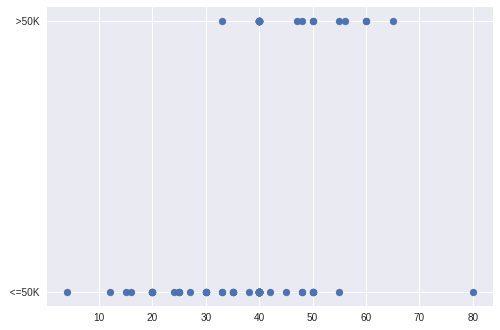

In [38]:
plt.scatter(df.sample(100, random_state=42).work_hours, df.sample(100, random_state=42).target)

In [0]:
df['work_hours_squared'] = df.work_hours ** 2

In [45]:
# improved a little.
X = scale(df.drop(['target', 'fnlwgt'], axis='columns'))
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)



model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8464844949339884

In [0]:
df = pd.get_dummies(df, columns=['age'])

In [60]:
# improved a lot when we encode age - which makes sense as its a very non linear variable
X = scale(df.drop(['target', 'fnlwgt'], axis='columns'))
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)



model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8498618360454406

In [0]:
pd.options.display.max_columns = 500

In [0]:
df = pd.get_dummies(df, columns=['education_numeric'])

In [69]:
# no improvement because education had categorical but wanted to try
X = scale(df.drop(['target', 'fnlwgt'], axis='columns'))
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)



model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8498618360454406

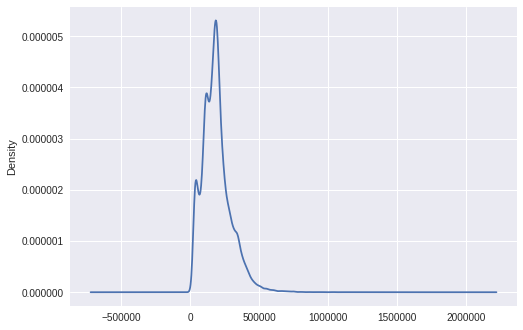

In [71]:
df.fnlwgt.plot.density()

In [74]:
(df.fnlwgt > 400000).mean()

0.03881944657719358

In [0]:
df['outlier_weightage'] = (df.fnlwgt > 400000)

In [77]:
# no improvement because education had categorical but wanted to try
X = scale(df.drop(['target', 'fnlwgt', 'outlier_weightage'], axis='columns'))
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=43)



model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8498618360454406